In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# Let ABC be some imaginary stock with a spot price of 100. 

# In the following code we will construct the profit diagram for some of the most common option strategies.

# The strike prices and the corresponding premiums for the options are set in an arbitrary but realistic way.

# There will be commentary regarding the composition of the strategies and the maximum risk/profit 
#and breakeven point associated with them.

# We suppose there are no commision fees

# The strategies which will be considered are 
# 1. COVERED CALL
# 2. MARRIED PUT
# 3. BULL CALL SPREAD
# 4. LONG STRADDLE
# 5. LONG STRANGLE
# 6. LONG CALL BUTTERFLY SPREAD
# 7. IRON CONDOR



# ABC stock price 
spot_price = 100

# Stock price range at expiration of the call/put
sT = np.arange(0*spot_price,2*spot_price,1)

# Long call
strike_price_long_call = 110
premium_long_call = 2.5

# Long put
strike_price_long_put = 90
premium_long_put = 2.5

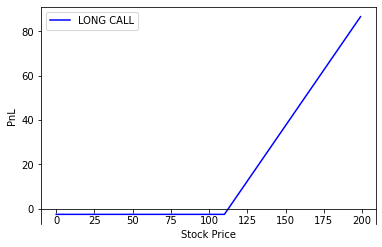

In [32]:
# LONG Call Profit Function

def call_profit(sT, strike_price, premium):
       return np.where(sT > strike_price, sT - strike_price, 0) - premium
profit_long_call = call_profit(sT, strike_price_long_call, premium_long_call)

# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,profit_long_call,label='LONG CALL',color='b')
plt.xlabel('Stock Price')
plt.ylabel('PnL')
plt.legend()
plt.show()


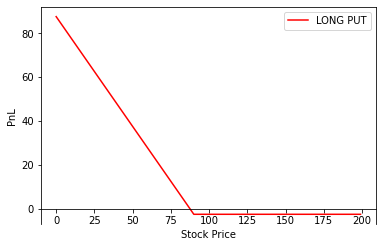

In [33]:
# LONG Put Profit Function

def put_profit(sT, strike_price, premium):
       return np.where(sT < strike_price, strike_price - sT, 0) - premium
profit_long_put = put_profit(sT, strike_price_long_put, premium_long_put)

#Plot

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,profit_long_put,label='LONG PUT',color='r')
plt.xlabel('Stock Price')
plt.ylabel('PnL')
plt.legend()
plt.show()


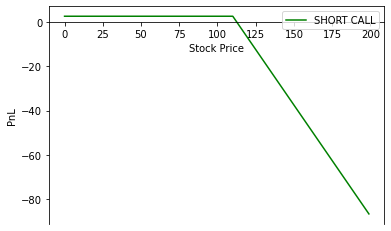

In [34]:
# SHORT Call Profit Function

def sh_call_profit(sT, strike_price, premium):
       return np.where(sT > strike_price, strike_price - sT, 0) + premium
profit_short_call = sh_call_profit(sT, strike_price_long_call, premium_long_call)

#Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,profit_short_call,label='SHORT CALL',color='g')
plt.xlabel('Stock Price')
plt.ylabel('PnL')
plt.legend()
plt.show()

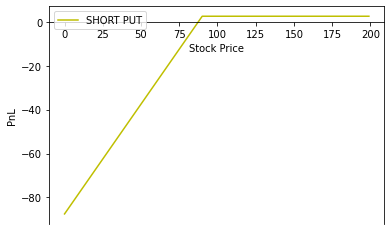

In [35]:
# SHORT Put Profif Function

def sh_put_profit(sT, strike_price, premium):
       return np.where(sT > strike_price, 0, sT - strike_price) + premium
profit_short_put = sh_put_profit(sT, strike_price_long_put, premium_long_put)

#Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,profit_short_put,label='SHORT PUT',color='y')
plt.xlabel('Stock Price')
plt.ylabel('PnL')
plt.legend()
plt.show()

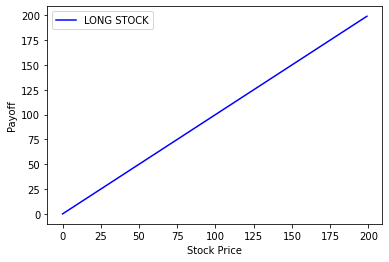

In [36]:
# LONG Stock PAYOFF

def long_stock_payoff(sT):
       return sT
payoff_long_stock = long_stock_payoff(sT)

#Plot

fig, ax = plt.subplots()
ax.plot(sT,payoff_long_stock,label='LONG STOCK',color='b')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.legend()
plt.show()

Max Profit: Call Premium + Strike Price - Spot Price; in this case 12.5 
Breakeven Point: Spot Price - Call Premium; in this case 97.5  
Max Risk: Spot Price - Call Premium; in this case 97.5 


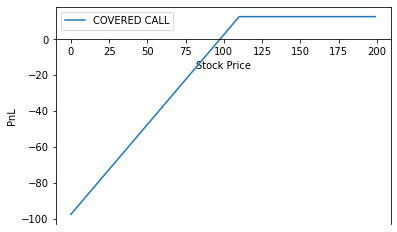

In [37]:
# 1. COVERED CALL 

#Composition: Long Stock and Short Call

profit_covered_call = (payoff_long_stock - spot_price) + profit_short_call 

print ("Max Profit: Call Premium + Strike Price - Spot Price; in this case 12.5 ")
print ("Breakeven Point: Spot Price - Call Premium; in this case 97.5  ")
print ("Max Risk: Spot Price - Call Premium; in this case 97.5 ")



fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,profit_covered_call,label='COVERED CALL')
plt.xlabel('Stock Price')
plt.ylabel('PnL')
plt.legend()
plt.show()


Max Profit: Unlimited 
Breakeven Point: Spot Price + Put Premium; in this case 102.5 
Max Risk: Put Premium; in this case 2.5 


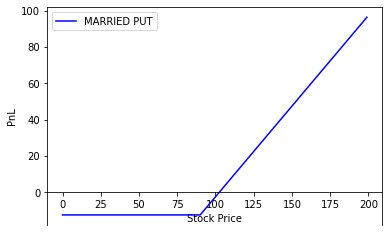

In [38]:
# 2. Married Put

#Composition: Long Stock and Long Put

profit_married_put = (payoff_long_stock - spot_price) + profit_long_put  

print ("Max Profit: Unlimited ")
print ("Breakeven Point: Spot Price + Put Premium; in this case 102.5 ")
print ("Max Risk: Put Premium; in this case 2.5 ")

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,profit_married_put,label='MARRIED PUT', color='b')
plt.xlabel('Stock Price')
plt.ylabel('PnL')
plt.legend()
plt.show()

Max Profit: Higher Strike - Lower Strike - Net Premium; in this case 8.5 
Breakeven Point: Strike Price of Long Call + Net Premium; in this case 111.5 
Max Risk: Net Premium; in this case is 1.5 


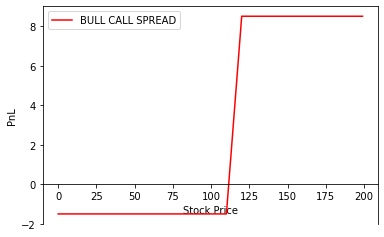

In [39]:
# 3. Bull Call Spread

# Composition: One Long Call and one Short Call with K1<K2; same underlying. same exp. date
# K1 = 110 with premium 2.5; K2 = 120 with premium 1 since it is further OTM

profit_short_call_1 = sh_call_profit(sT, strike_price_long_call+10, premium_long_call-1.5)

profit_bull_call_spread = profit_long_call + profit_short_call_1 

print ("Max Profit: Higher Strike - Lower Strike - Net Premium; in this case 8.5 ")
print ("Breakeven Point: Strike Price of Long Call + Net Premium; in this case 111.5 ")
print ("Max Risk: Net Premium; in this case is 1.5 ")

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,profit_bull_call_spread,label='BULL CALL SPREAD', color='r')
plt.xlabel('Stock Price')
plt.ylabel('PnL')
plt.legend()
plt.show()

Max Profit: In the right side unlimited 
Breakeven Point: K - Combined Premium OR K + Combined Premium; in this case 77.5 or 102.5 
Max Risk: The combined Premium; in this case 10 + 2.5 = 12.5 


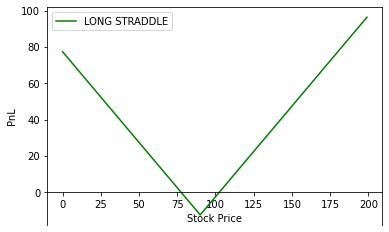

In [40]:
# 4. Long Straddle 

# Composition: One Long Put, one Long Call; same K, same exp. date, same underlying
# K = 90; the premium long call should be higher since it is ITM 
# It should be at least as the intrinsic value which is 10

profit_long_call_1 = call_profit(sT, strike_price_long_put, premium_long_call+7.5)

profit_long_straddle = profit_long_put + profit_long_call_1 

print ("Max Profit: In the right side unlimited ")
print ("Breakeven Point: K - Combined Premium OR K + Combined Premium; in this case 77.5 or 102.5 ")
print ("Max Risk: The combined Premium; in this case 10 + 2.5 = 12.5 ")

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,profit_long_straddle,label='LONG STRADDLE', color='G')
plt.xlabel('Stock Price')
plt.ylabel('PnL')
plt.legend()
plt.show()

Max Profit, Breakeven Point and Max Risk are determined in the same way as in the Long Straddle  


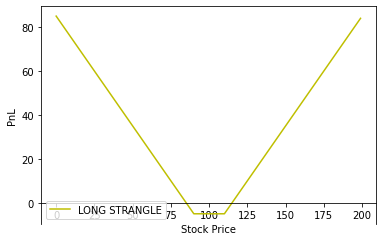

In [41]:
# 5. Long Strangle 

# Composition: One Long Call with a higher strike privce and one Long Put with a lower strike price
# See that the strike price of the call and the put differ themselves, i.e 90/put and 110/call

profit_long_strangle = profit_long_put + profit_long_call

print ("Max Profit, Breakeven Point and Max Risk are determined in the same way as in the Long Straddle  ")

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,profit_long_strangle,label='LONG STRANGLE', color='y')
plt.xlabel('Stock Price')
plt.ylabel('PnL')
plt.legend()
plt.show()

Max Profit: K2 - K1 = Combined Net Premium; in this case 120 - 110 - 2*1 + 2.5 + 0.5 = 11
Breakeven Point: K1 + Net Premium OR K3 - Net Premium; in this case 110 + 1 = 111 OR 130 - 1 = 129
Max Risk: Net Premium; in this case 1


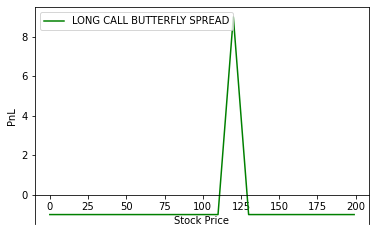

In [42]:
# 6. Long Call Butterfly Spread 

# Composition: One Long Call K1 str. price; Two short calls K2 str. price; One Long Call K3 str. price
# K1 < K2 < K3

profit_short_call_2 = sh_call_profit(sT, strike_price_long_call+10, premium_long_call-1.5)
profit_long_call_2 = call_profit(sT, strike_price_long_call+20, premium_long_call-2)

profit_long_call_butterfly_spread = profit_long_call + 2*profit_short_call_2 + profit_long_call_2

print ("Max Profit: K2 - K1 = Combined Net Premium; in this case 120 - 110 - 2*1 + 2.5 + 0.5 = 11")
print ("Breakeven Point: K1 + Net Premium OR K3 - Net Premium; in this case 110 + 1 = 111 OR 130 - 1 = 129")
print ("Max Risk: Net Premium; in this case 1")

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,profit_long_call_butterfly_spread,label='LONG CALL BUTTERFLY SPREAD', color='g')
plt.xlabel('Stock Price')
plt.ylabel('PnL')
plt.legend()
plt.show()

Max Profit: Net Premium earned; in this case 3 since 2.5 + 2.5 - 1 = 1 = 3  
Max Risk: K4 - K3 - Net Premium or K1 - K2 - Net Premium; in this case 10 - 3 = 7 in both cases 


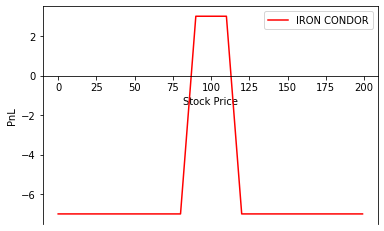

In [43]:
# 7. iron Condor 

#COMPOSITION: One short call OTM; K3 strike price
#             One short Put OTM;  K2 strike price
#             One long call further OTM; K4>K3
#             One long put further OTM; K1<K2

profit_long_put_3 = put_profit(sT, strike_price_long_put-10, premium_long_put-1.5)
profit_long_call_3 = call_profit(sT, strike_price_long_call+10, premium_long_call-1.5)

profit_iron_condor = profit_short_call + profit_short_put + profit_long_call_3 + profit_long_put_3

print ("Max Profit: Net Premium earned; in this case 3 since 2.5 + 2.5 - 1 = 1 = 3  ")
print ("Max Risk: K4 - K3 - Net Premium or K1 - K2 - Net Premium; in this case 10 - 3 = 7 in both cases ")

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,profit_iron_condor,label='IRON CONDOR', color='r')
plt.xlabel('Stock Price')
plt.ylabel('PnL')
plt.legend()
plt.show()